In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.fftpack as spfft
from numpy import linalg as LA
import sys

In [2]:
####  OMP  ####
def omp(X, y, nonneg=True, nsoltncoef=None, maxit=200, tol=1e-3):

    # by default set max number of soltncoef to half of total possible
    if nsoltncoef is None:
        nsoltncoef = int(X.shape[1]/2)
    
    ############# initialize things # algorithm step 0(Input) ############
    X_transpose = X.T                       
    nonzerosoltncoef = []
    soltncoef = np.zeros(X.shape[1], dtype=float) 
    residual = y                           
    ypred = np.zeros(y.shape, dtype=float)
    err = np.zeros(maxit, dtype=float)      
   
    ############ main iteration # algorithm step 1 #############
    for it in range(maxit):
        # compute residual covariance vector and check threshold
        rcov = np.dot(X_transpose, residual)
        # algorithm step 3 choose i to maximize step2
        if nonneg:
            i = np.argmax(rcov)
            rc = rcov[i]
        else:
            i = np.argmax(np.abs(rcov))
            rc = np.abs(rcov[i])
        
        # algorithm step 2 (nonzero components)
        if i not in nonzerosoltncoef:
            nonzerosoltncoef.append(i)

        # algorithm step 2( least squares)
        soltncoefi, _, _, _ = np.linalg.lstsq(X[:, nonzerosoltncoef], y)
        soltncoef[nonzerosoltncoef] = soltncoefi   # update solution
        
        ######## algorithm step 3 ########
        residual = y - np.dot(X[:,nonzerosoltncoef], soltncoefi)
        ypred = y - residual
        
        ######### check stopping criteria # algorithm step 4 ########
        err[it] =  np.linalg.norm(residual)**2 
        if err[it] < tol:  # converged
            print('\nConverged at',it)
            break
        if len(nonzerosoltncoef) >= nsoltncoef:   # hit max soltncoefficients
            print('\nFound solution with max number of soltncoefficients.')
            break
        if it == maxit-1:  # max iterations
            print('\nreached the max number of iterations.')
    return soltncoef, nonzerosoltncoef, err[:(it+1)], residual, ypred

if __name__ == '__main__':
    pass

In [3]:
# generate a grid
npts = 64
domain = np.linspace(0, 1, npts)

# generate a dictionary and manufactured solution
X = np.array([np.cos(2 * np.pi * m * domain) for m in range(4)]).T
soltncoef = [0., 1., 0., .5]
y = np.dot(X, soltncoef)

Text(0.5, 1.0, 'inputs')

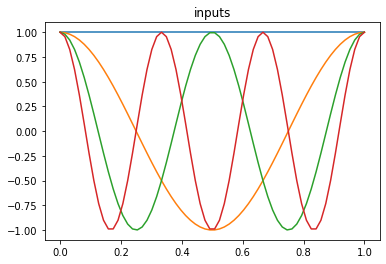

In [4]:
plt.plot(domain, X)
plt.title('inputs')

Text(0.5, 1.0, 'Response')

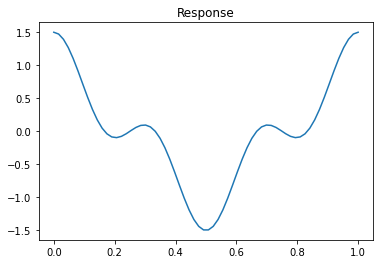

In [5]:
plt.plot(domain, y)
plt.title('Response')

In [6]:
# reconstruct
soltncoef, nonzerosoltncoef, err, residual, ypred = omp(X, y)
# print('Solution: %r' % result.soltncoef)


Converged at 1


C:\Users\Chenyang Cao\AppData\Local\Temp\ipykernel_9492\3526480553.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soltncoefi, _, _, _ = np.linalg.lstsq(X[:, nonzerosoltncoef], y)


Text(0.5, 1.0, 'Predicted and true responses')

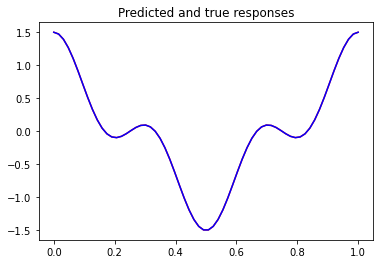

In [7]:
plt.plot(domain, y,'r')
plt.plot(domain, ypred,'b')
plt.title('Predicted and true responses')

In [8]:
soltncoef2 = [0., 1., 0., -0.5]
y2 = np.dot(X, soltncoef2)

soltncoef, nonzerosoltncoef, err, residual, ypred  = omp(X, y2)
print('Solution is ',soltncoef)


reached the max number of iterations.
Solution is  [0.         0.98461538 0.         0.        ]


C:\Users\Chenyang Cao\AppData\Local\Temp\ipykernel_9492\3526480553.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soltncoefi, _, _, _ = np.linalg.lstsq(X[:, nonzerosoltncoef], y)


Text(0.5, 1.0, 'Predicted and true responses')

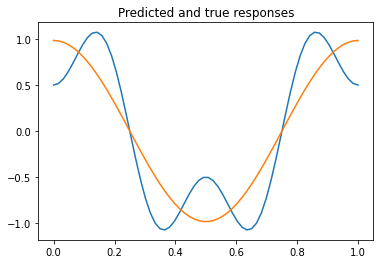

In [9]:
plt.plot(domain, y2)
plt.plot(domain, ypred)
plt.title('Predicted and true responses')

In [10]:
#soltncoef2 = [0., 1., 0., -0.5]
y2 = np.dot(X, soltncoef)

soltncoef, nonzerosoltncoef, err, residual, ypred  = omp(X, y2)
print('Solution is ',soltncoef)


Converged at 0
Solution is  [0.         0.98461538 0.         0.        ]


C:\Users\Chenyang Cao\AppData\Local\Temp\ipykernel_9492\3526480553.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soltncoefi, _, _, _ = np.linalg.lstsq(X[:, nonzerosoltncoef], y)


Text(0.5, 1.0, 'Predicted and true responses')

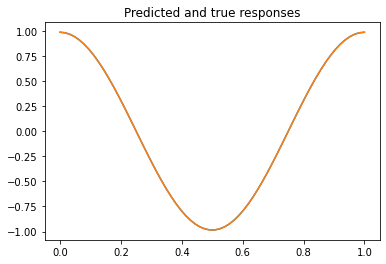

In [11]:
plt.plot(domain, y2)
plt.plot(domain, ypred)
plt.title('Predicted and true responses')

In [12]:
soltncoef, nonzerosoltncoef, err, residual, ypred  = omp(X, y2, nonneg=False)
print('Solution', soltncoef)


Converged at 0
Solution [0.         0.98461538 0.         0.        ]


C:\Users\Chenyang Cao\AppData\Local\Temp\ipykernel_9492\3526480553.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soltncoefi, _, _, _ = np.linalg.lstsq(X[:, nonzerosoltncoef], y)


Text(0.5, 1.0, 'Predicted and true responses')

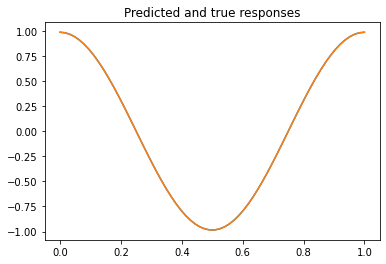

In [13]:
plt.plot(domain, y2)
plt.plot(domain, ypred)
plt.title('Predicted and true responses')

In [14]:
#### GPSR ####
def GPSR_Basic(y: np.ndarray, A: np.ndarray, tau: np.ndarray, true_x: np.ndarray = None):

    def AT_(x: np.ndarray):
        return A.T@x

    def A_(x: np.ndarray):
        return A@x

    if true_x is not None:
        compute_mse = True
    else:
        compute_mse = False
    
    # Set the defaults for the optional parameters
    stopCriterion = 3 
    tolA = 0.01 
    tolD = 0.0001 
    debias = 0
    maxiter = 10000 
    maxiter_debias = 500 
    miniter = 5 
    miniter_debias = 0 
    init = 0
    verbose = True
    continuation = 1
    cont_steps = 5 
    firstTauFactorGiven = 0
    firstTauFactor = 0.5*np.max(np.abs(AT_(y)))

    realmin = np.finfo(float).tiny
    eps = np.finfo(float).eps
    # sufficient decrease parameter for GP line search
    mu = 0.1 
    # backtracking parameter for line search 
    lambda_backtrack = 0.5 
    
    # Set the defaults for outputs that may not be computed
    debias_start = 0 
    x_debias = [] 
    mses = []
    objective = []
    times_list = []
    lambdas = []

    
    if stopCriterion in [0, 1, 2, 3, 4]:
        print("error", "Unknown stopping criterion")

    # Precompute A.T@y since it'll be used a lot
    Aty = AT_(y)

    # Initialization
    if init == 0:   # initialize at zero, using AT to find the np.shape of x
        x = AT_(np.zeros_like(y))
    elif init == 1:   # initialize randomly, using AT to find the np.shape of x
        x = np.random.randn(np.shape(AT_(np.zeros_like(y)))[0], np.shape(AT_(np.zeros_like(y)))[1])
    else:   # initialize x0 = A.T@y
        x = Aty

    # now check if tau is an array  if it is, it has to
    # have the same np.shape as x
    if np.prod(np.shape(tau)) > 1:
        try:
            dummy = x*tau
        except:
            raise NameError('Parameter tau has wrong dimensions  it should be scalar or np.shape(x)')


    # if the true x was given, check its np.shape
    if compute_mse and (np.shape(true_x) != np.shape(x)):
        raise NameError('Initial x has incompatible np.shape')

    # if tau is scalar, we check its value  if it's large enough,
    # the optimal solution is the zero vector
    if np.prod(np.shape(tau)) == 1:
        aux = AT_(y)
        max_tau = np.max(np.abs(aux))
        if tau >= max_tau:
            x = np.zeros_like(aux)
            if debias:
                x_debias = x
            objective.append(0.5*(y.T@y))
            times_list.append(0)
            if compute_mse:
                mses.append(np.sum(np.power(x - true_x, 2)))
            return

    # initialize u and v
    u = x*(x >= 0)
    v = -x*(x < 0)

    # define the indicator vector or matrix of nonzeros in x
    nz_x = (x != 0.0)
    num_nz_x = np.sum(nz_x)

    # Compute and store initial value of the objective function
    resid =  y - A_(x)
    f = 0.5*(resid.T@resid) + np.sum(tau*u) + np.sum(tau*v)

    # auxiliary vector on ones, same np.shape as x
    onev = np.ones_like(x)

    # start the clock
    t0 = time.time()

    # store given tau, because we're going to change it in the
    # continuation procedure
    final_tau = tau

    # store given stopping criterion and threshold, because we're going
    # to change them in the continuation procedure
    final_stopCriterion = stopCriterion
    final_tolA = tolA

    # set continuation factors
    if continuation and (cont_steps > 1):
        # If tau is scalar, first check top see if the first factor is
        # too large (i.e., large enough to make the first
        # solution all zeros). If so, make it a little smaller than that.
        # Also set to that value as default
        if np.prod(np.shape(tau)) == 1:
            if (firstTauFactorGiven == 0) or (firstTauFactor*tau >= max_tau):
                firstTauFactor = 0.8*max_tau / tau
                print('parameter FirstTauFactor too large  changing')

        cont_factors = 10**np.arange(np.log10(firstTauFactor), 0, np.log10(1/firstTauFactor)/(cont_steps-1))
    else:
        cont_factors = np.array([1])
        cont_steps = 1


    iter_ = 1
    if compute_mse:
        mses.append(np.sum(np.power(x - true_x, 2)))


    # loop for continuation
    for cont_loop in range(cont_steps):

        tau = final_tau * cont_factors[cont_loop-1]

        if verbose:
            print(f'\nSetting tau = {tau}\n')

        if cont_loop == cont_steps:
           stopCriterion = final_stopCriterion
           tolA = final_tolA
        else:
           stopCriterion = 3
           tolA = 1e-3


        # Compute and store initial value of the objective function
        resid = y - A_(x)
        f = 0.5*(resid.T@resid) + np.sum(tau*u) + np.sum(tau*v)

        objective.append(f)
        times_list.append(time.time() - t0)

        # Compute the useful quantity resid_base
        resid_base = y - resid

        # control variable for the outer loop and iteration counter
        # cont_outer = (np.linalg.norm(projected_gradient) > 1.e-5)

        keep_going = 1

        if verbose:
            print('\nInitial obj=%10.6e, nonzeros=%7d\n', f, num_nz_x)

        while keep_going:
            x_previous = x

            # compute gradient
            temp = AT_(resid_base)
            term  =  temp - Aty
            gradu =  term + tau
            gradv = -term + tau

            # set search direction
            # du = -gradu  dv = -gradv  dx = du-dv
            dx = gradv-gradu
            old_u = u
            old_v = v

            # calculate useful matrix-vector product involving dx
            auv = A_(dx)
            dGd = auv.T@auv
            
            # calculate unconstrained minimizer along this direction, use this
            # as the first guess of steplength parameter lambda
            #  lambda0 = - (gradu.T@du + gradv.T@dv) / dGd
            
            # use instead a first guess based on the "conditional" direction
            condgradu = ((old_u > 0) + (gradu < 0)) * gradu
            condgradv = ((old_v > 0) + (gradv < 0)) * gradv
            auv_cond = A_(condgradu-condgradv)
            dGd_cond = auv_cond.T@auv_cond
            lambda0 = (gradu.T@condgradu + gradv.T@condgradv) / (dGd_cond + realmin)
            
            # loop to determine steplength, starting wit the initial guess above.
            lambda_ = lambda0
            while True:
                # calculate step for this lambda_ and candidate point
                du = np.maximum(u-lambda_*gradu, np.zeros(1)) - u
                u_new = u + du
                dv = np.maximum(v-lambda_*gradv, np.zeros(1)) - v
                v_new = v + dv
                dx = du-dv
                x_new = x + dx
                
                # evaluate function at the candidate point
                resid_base = A_(x_new)
                resid = y - resid_base
                f_new = 0.5*(resid.T@resid) + np.sum(tau*u_new) + np.sum(tau*v_new)
                # test sufficient decrease condition
                if f_new <= f + mu * (gradu.T@du + gradv.T@dv):
                    break
                lambda_ = lambda_ * lambda_backtrack
                print(f'\n reducing lambda_ to {lambda_}\n')

            u = u_new
            v = v_new
            prev_f = f
            f = f_new
            uvmin = np.minimum(u,v)
            u = u - uvmin
            v = v - uvmin
            x = u-v

            # calculate nonzero pattern and number of nonzeros (do this *always*)
            nz_x_prev = nz_x
            nz_x = (x!=0.0)
            num_nz_x = np.sum(nz_x)

            iter_ = iter_ + 1
            objective.append(f)
            times_list.append(time.time()-t0)
            lambdas.append(lambda_)

            if compute_mse:
                err = true_x - x
                mses.append(err.T@err)

            # print out stuff
            if verbose:
                print(f'It ={iter_}, obj={f}, lambda={lambda_}, nz={num_nz_x}')

            if stopCriterion == 0:
                # compute the stopping criterion based on the change
                # of the number of non-zero components of the estimate
                num_changes_active = (np.sum(nz_x!=nz_x_prev))
                if num_nz_x >= 1:
                    criterionActiveSet = num_changes_active
                else:
                    criterionActiveSet = tolA / 2
                keep_going = (criterionActiveSet > tolA)
                if verbose:
                    print(f'Delta n-zeros = {criterionActiveSet} (target = {tolA})\n')

            elif stopCriterion == 1:
                # compute the stopping criterion based on the relative
                # variation of the objective function.
                criterionObjective = np.abs(f-prev_f)/(prev_f)
                keep_going = (criterionObjective > tolA)
                if verbose:
                    print(f'Delta obj. = {criterionObjective} (target = {tolA})\n')

            elif stopCriterion == 2:
                # stopping criterion based on relative np.linalg.norm of step taken
                delta_x_criterion = np.linalg.norm(dx)/np.linalg.norm(x)
                keep_going = (delta_x_criterion > tolA)
                if verbose:
                    print(f'norm(delta x)/norm(x) = {delta_x_criterion} (target = {tolA})\n')

            elif stopCriterion == 3:
                # compute the "LCP" stopping criterion - again based on the previous
                # iterate. Make it "relative" to the np.linalg.norm of x.
                w = np.hstack((np.minimum(gradu, old_u), np.minimum(gradv, old_v)))
                criterionLCP = np.linalg.norm(w, np.Inf)
                criterionLCP = criterionLCP / np.max([1.0e-6, np.linalg.norm(old_u,np.Inf), np.linalg.norm(old_v,np.Inf)])
                keep_going = (criterionLCP > tolA)
                if verbose:
                    print(f'LCP = {criterionLCP} (target = {tolA})\n')

            elif stopCriterion == 4:
                # continue if not yeat reached target value tolA
                keep_going = (f > tolA)
                if verbose:
                    print(f'Objective = {f} (target = {tolA})\n')

            else:
                raise NameError('Unknwon stopping criterion')
            # end of the stopping criteria switch

            # take no less than miniter...
            if iter_<=miniter:
                keep_going = 1
            else: # and no more than maxiter iterations
                if iter_ > maxiter:
                    keep_going = 0
        # end of the main loop of the GP algorithm

    # end of the continuation loop

    # Print results
    if verbose:
        print('\nFinished the main algorithm!\nResults:\n')
        print(f'||A x - y ||_2^2 = {resid.T@resid}\n')
        print(f'||x||_1 = {np.sum(np.abs(x))}\n')
        print(f'Objective function = {f}\n')
        nz_x = (x!=0.0)
        num_nz_x = np.sum(nz_x)
        print(f'Number of non-zero components = {num_nz_x}\n')
        print(f'CPU time so far = {times_list[iter_-1]}\n')
        print('\n')


    # If the 'Debias' option is set to 1, we try to remove the bias from the l1
    # penalty, by applying CG to the least-squares problem obtained by omitting
    # the l1 term and fixing the zero coefficients at zero.

    # do this only if the reduced linear least-squares problem is
    # overdetermined, otherwise we are certainly applying CG to a problem with a
    # singular Hessian

    if (debias and (np.sum(x!=0)!=0)):
        if (num_nz_x > np.size(y)):
            if verbose:
                print('\n')
                print('Debiasing requested, but not performed\n')
                print('There are too many nonzeros in x\n\n')
                print('nonzeros in x: %8d, length of y: %8d\n',num_nz_x, np.size(y))

        elif (num_nz_x==0):
            if verbose:
                print('\n')
                print('Debiasing requested, but not performed\n')
                print('x has no nonzeros\n\n')

        else:
            if verbose:
              print('\n')
              print('Starting the debiasing phase...\n\n')

            x_debias = x
            zeroind = (x_debias!=0)
            cont_debias_cg = 1
            debias_start = iter_

            # calculate initial residual
            resid = A_(x_debias)
            resid = resid-y
            resid_prev = eps*np.ones_like(resid)

            rvec = AT_(resid)

            # mask out the zeros
            rvec = rvec * zeroind
            rTr_cg = rvec.T@rvec

            # set convergence threshold for the residual || RW x_debias - y ||_2
            tol_debias = tolD * (rvec.T@rvec)

            # initialize pvec
            pvec = -rvec

            # main loop
            while cont_debias_cg:

                # calculate A*p = Wt * Rt * R * W * pvec
                RWpvec = A_(pvec)
                Apvec = AT_(RWpvec)
                
                # mask out the zero terms
                Apvec = Apvec * zeroind
                
                # calculate alpha for CG
                alpha_cg = rTr_cg / (pvec.T@ Apvec)
                
                # take the step
                x_debias = x_debias + alpha_cg * pvec
                resid = resid + alpha_cg * RWpvec
                rvec  = rvec  + alpha_cg * Apvec
                
                rTr_cg_plus = rvec.T@rvec
                beta_cg = rTr_cg_plus / rTr_cg
                pvec = -rvec + beta_cg * pvec
                
                rTr_cg = rTr_cg_plus
                
                iter_ = iter_+1
                
                objective.append(0.5*(resid.T@resid) + np.sum(tau*np.abs(x_debias)))
                times_list.append(time.time() - t0)
                if compute_mse:
                    err = true_x - x_debias
                    mses.append((err.T@err))
                if verbose:
                    # in the debiasing CG phase, always use convergence criterion
                    # based on the residual (this is standard for CG)
                    print(' Iter = %5d, debias resid = %13.8e, convergence = %8.3e\n', iter_, resid.T@resid, rTr_cg / tol_debias)
    
                cont_debias_cg = (iter_-debias_start <= miniter_debias )or ((rTr_cg > tol_debias) and (iter_-debias_start <= maxiter_debias))

            if verbose:
                print('\nFinished the debiasing phase!\nResults:\n')
                print(f'||A x - y ||^2_2 = {resid.T@resid}\n')
                print(f'||x||_1 = {np.sum(np.abs(x))}\n')
                print(f'Objective function = {f}\n')
                nz = (x_debias != 0.0)
                print(f'Number of non-zero components = {np.sum(nz)}\n')
                print(f'CPU time so far = {times_list[iter_-1]}\n', )
                print('\n') 

    # mses = np.array(mses)
    if compute_mse:
        for k in range(len(mses)):
            mses[k] = mses[k]/np.size(true_x)
    
    return x, [x_debias, objective, times_list, debias_start, mses]

error Unknown stopping criterion
parameter FirstTauFactor too large  changing

Setting tau = [0.20028434]


Initial obj=%10.6e, nonzeros=%7d
 [[259.11787601]] 0
It =2, obj=[[150.68770673]], lambda=[[1.17043996]], nz=2620
LCP = 3728227.492626768 (target = 0.001)

It =3, obj=[[102.02706189]], lambda=[[7.85770653]], nz=737
LCP = 0.2785188316263889 (target = 0.001)

It =4, obj=[[80.84635224]], lambda=[[8.86868237]], nz=403
LCP = 0.05136216516447744 (target = 0.001)

It =5, obj=[[70.63483172]], lambda=[[8.2896195]], nz=351
LCP = 0.04225295657596437 (target = 0.001)

It =6, obj=[[63.68737278]], lambda=[[3.32956832]], nz=203
LCP = 0.009863497847682581 (target = 0.001)

It =7, obj=[[58.4574748]], lambda=[[16.69937908]], nz=180
LCP = 0.01802871069343544 (target = 0.001)

It =8, obj=[[53.92334689]], lambda=[[3.7212287]], nz=93
LCP = 0.006632795615164896 (target = 0.001)

It =9, obj=[[53.11781966]], lambda=[[18.18843876]], nz=72
LCP = 0.0029424355929302424 (target = 0.001)

It =10, obj=[[52.85944

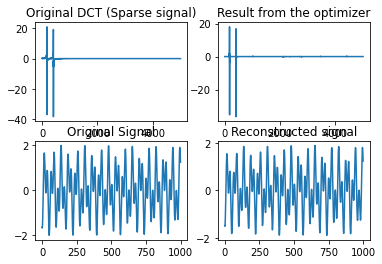

In [16]:
# Create an example for signal reconstruction
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

# extract small sample of signal
m = 500
ri = np.random.choice(n, m, replace=False)
ri.sort()
t2 = t[ri]
y2 = y[ri]

A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

y2 = y2.reshape(-1, 1)
yt = yt.reshape(-1, 1)


# ###############################
# Test the optimizer === x, _ = optimizer(y, A, ...)
# ###############################

x, _ = GPSR_Basic(y=y2, A=A, tau=np.array([0.08]))
#error Unknown stopping criterion
# ###############################

x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

plt.figure()
plt.subplot(221)
plt.plot(yt)
plt.title("Original DCT (Sparse signal)")
plt.subplot(222)
plt.plot(x)
plt.title("Result from the optimizer")
plt.subplot(223)
plt.plot(y[2000:3000])
plt.title("Original Signal")
plt.subplot(224)
plt.plot(sig[2000:3000])
plt.title("Reconstructed signal")
plt.show()

In [17]:
#### spaRSA ####

def f(A, x, y):
    residual = A @ x - y
    return np.dot(residual, residual) / 2

def gradient(A, x, y):
    return A.T @ (A @ x - y)

def phi(A, x, y, tau, norm=1):
    return f(A, x, y) + tau * LA.norm(x, norm)

In [18]:
def soft(u, a):
    # u is a vector, a is a scalar
    # element-wise operations
    return np.sign(u) * np.maximum(np.abs(u) - a, 0)

def hard(u, a):
    # u is a vector, a is a scalar
    # element-wise operations
    return u * (np.abs(u) > a)

def solve_sub_prob(u, tau, alpha, norm=1):
    # u: vector
    # tau, alpha: scalar
    # norm: 1 or 0 (either l-1 or l-0 norm)
    # assume we do not use any other norms
    if norm == 1:
        return soft(u, tau / alpha)
    return hard(u, np.sqrt(2 * tau / alpha))

In [19]:
def barzilai_borwein(A, x, prev_x):
    alpha_min = 1e-10 # constant alpha min
    alpha_max = 1e10 # constant alpha max
    # A: given matrix
    # x: x_k
    # prev_x: x_(k-1)
    s = x - prev_x
    # add fl. pt. correction
    alpha = np.dot(A @ s, A @ s) / (sys.float_info.min + np.dot(s, s))
    alpha = min(alpha_max, max(alpha_min, alpha))
    return alpha

In [20]:
def spaRSA(A, y, tau, norm=1):
    eta = 1.5 # factor, eta > 1
    k = 0 # iter counter
    x = np.zeros(A.shape[1]) # init guess of x
    alpha = 1.0 # init alpha
    tol = 1e-4
    
    while True:
        # save current value
        prev_x = x
        prev_phi = phi(A, prev_x, y, tau, norm)
        # find the next x
        while True:
            u = prev_x - gradient(A, prev_x, y) / alpha
            x = solve_sub_prob(u, tau, alpha, norm) # update x_k
            alpha *= eta # update alpha_k
            curr_phi = phi(A, x, y, tau, norm)
            if curr_phi < prev_phi:
                break # the acceptance criterion is satisfied

        k += 1 # update counter
        alpha = barzilai_borwein(A, x, prev_x) # choose the next alpha
        if np.abs(curr_phi - prev_phi) / prev_phi < tol:
            break # stop criterion: no more relative decrease
    # end of outer loop
    yhat = A @ x
    return x, yhat

Text(0.5, 1.0, 'inputs')

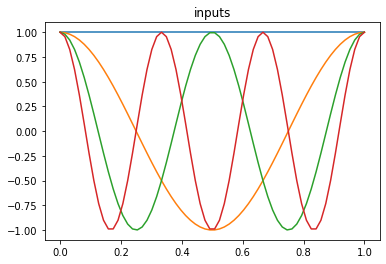

In [21]:
####### test for spaRSA ########
# generate a grid
npts = 64
domain = np.linspace(0, 1, npts)

# generate a dictionary and manufactured solution
A = np.array([np.cos(2 * np.pi * m * domain) for m in range(4)]).T
soltncoef = [0., 1., 0., .5]
y = np.dot(A, soltncoef)

tau = 0.2 * np.max(np.abs(gradient(A, np.zeros(A.shape[1]), y)))

plt.plot(domain, A)
plt.title('inputs')

Text(0.5, 1.0, 'Response')

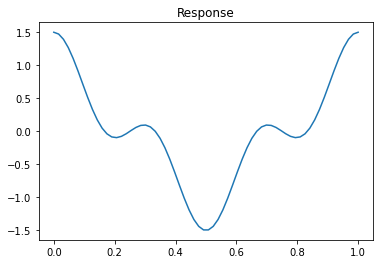

In [22]:
plt.plot(domain, y)
plt.title('Response')

In [23]:
# reconstruct
x, yhat = spaRSA(A, y, tau)

Text(0.5, 1.0, 'Predicted and true responses')

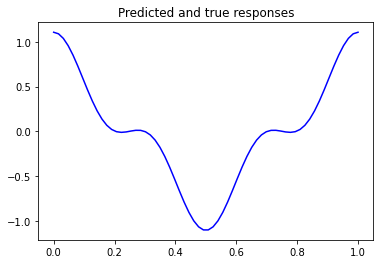

In [24]:
plt.plot(domain, yhat,'b')
plt.title('Predicted and true responses')